<h2><b><center>SMARTPHONE MARKET ANALYSIS:<br> A Data-Driven Approach to Popularity, Pricing, and Sales Trends</center></b></h2>


<h2>1.1. BUSINESS UNDERSTANDING</h2>
<P>The company (or marketplace) wants to understand the mobile phone market:
    <ul>
        <li>Which brands/models are most popular</li>
        <li>How price, features (battery, screen size, memory), and release date influence popularity and sales</li>
        <li>Which operating systems dominate (Android, iOS, KaiOS, etc.)</li>
        <li>How many sellers are offering each phone model</li>
    </ul>
</P>

<h2>1.2 BUSINESS OBJECTIVES</h2>
<ul>
    <li>Identifying leading brands and products</li>
    <li>Analyzing pricing strategies</li>
     <li>Evaluating operating system performance</li>
     <li>Monitoring consumer demand trends </li>
     <li>Spotting opportunities in niche brands </li>
</ul>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
phone=pd.read_csv("phones_data.csv")
phone.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [3]:
#identifying the shape of the data frame
phone.shape

(1224, 13)

In [4]:
#identifying the datatypes information
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


In [5]:
#identifying the null values
phone.isna().idxmax()

Unnamed: 0          0
brand_name          0
model_name          0
os                 12
popularity          0
best_price          0
lowest_price        4
highest_price       4
sellers_amount      0
screen_size       307
memory_size        13
battery_size      177
release_date        0
dtype: int64

In [6]:
#filling in the float with meadian
for col in phone.select_dtypes(include='float64').columns:
    if phone[col].isnull().any():
        median_val = phone[col].median()
        phone[col].fillna(median_val, inplace=True)

In [7]:
#using the for loop we will fill all the string datatypes with mode 
for col in phone.select_dtypes(include='object').columns:
    if phone[col].isnull().any():
        mode_val = phone[col].mode()[0]
        phone[col].fillna(mode_val, inplace=True)

In [8]:
phone.isna().idxmax()

Unnamed: 0        0
brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

In [9]:
phone['release_date'] = pd.to_datetime(phone['release_date'], errors='coerce')

# Then convert to integer in YYYYMMDD format
phone['release_date'] = phone['release_date'].dt.strftime("%Y%m%d").astype(int)

/tmp/ipykernel_10919/2844899449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  phone['release_date'] = pd.to_datetime(phone['release_date'], errors='coerce')


In [10]:
phone['year'] = phone['release_date'].astype(str).str[:4].astype(int)

In [11]:
phone.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,year
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,20201001,2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,20200901,2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,20200901,2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,20200901,2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,4574.0,5325.5,10,5.71,16.0,3000.0,20200401,2020


<h2>EXPLANATORY DATA ANALYSIS</h2>

<h4>PRICE DISTRIBUTION</h4>

/home/john/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


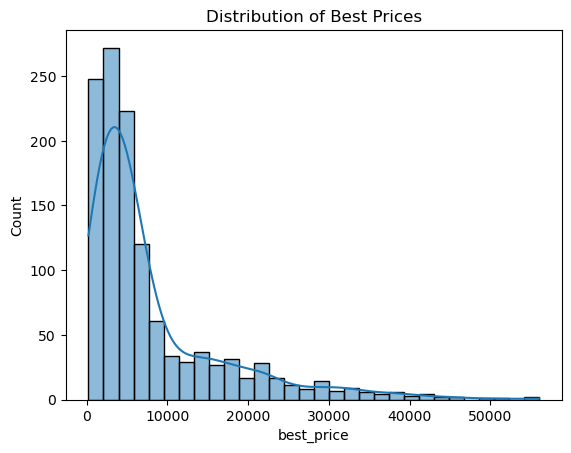

In [12]:
# 1. Price distribution
sns.histplot(phone['best_price'], bins=30, kde=True)
plt.title("Distribution of Best Prices")
plt.show()

<H4>BEST MARKET PRICE PER PHONE BRAND </H4>

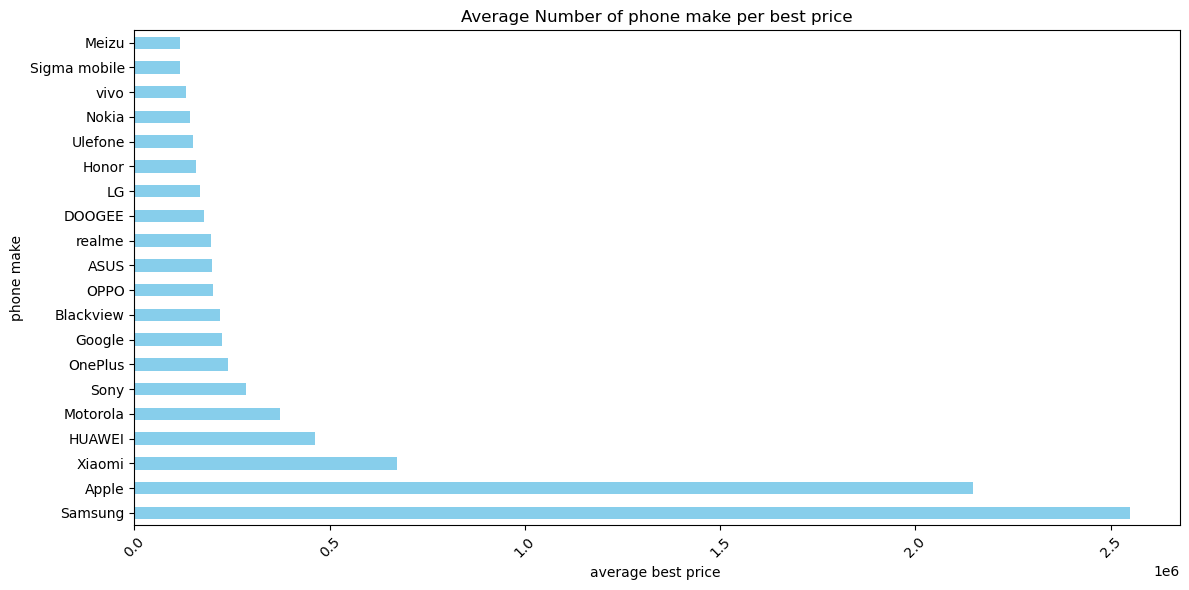

In [42]:
#Average price per brand_name
avg_prc_brnd = phone.groupby('brand_name')["best_price"].sum().sort_values(ascending=False)

# (Optional) limit to top 10 for clearer plot
avg_prc_brnd_10= avg_prc_brnd.head(20)

# Plot
plt.figure(figsize=(12, 6))
avg_prc_brnd_10.plot(kind='barh', color='skyblue')

plt.title('Average Number of phone make per best price')
plt.ylabel('phone make')
plt.xlabel('average best price ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<H4>CORRELATIONSHIP BETWEEN BATTERY SIZE AND THE BEST PRICE</H4>

<h4>conc:Microsoft phones are the best in average prices in market</h4>

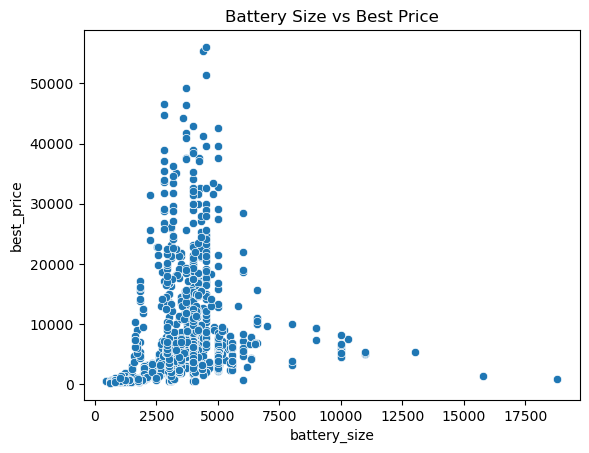

In [14]:
# 3. Battery vs Price
sns.scatterplot(x='battery_size', y='best_price', data=phone)
plt.title("Battery Size vs Best Price")
plt.show()

<h4>conc:There is a negative relationship between the battery size and the price of the phone</h4>

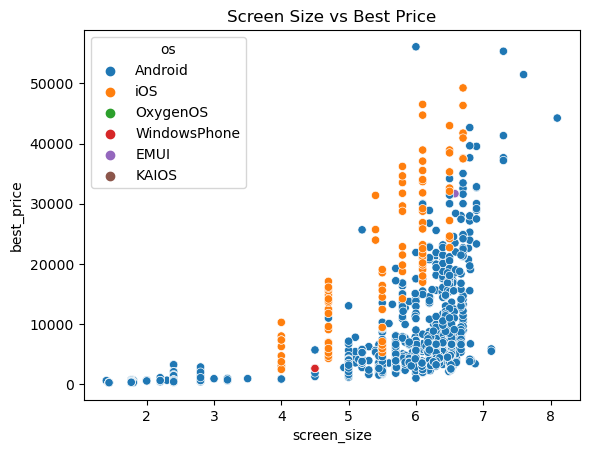

In [15]:
# Screen Size vs Price
sns.scatterplot(x='screen_size', y='best_price', hue='os', data=phone)
plt.title("Screen Size vs Best Price")
plt.show()

<H4>THE ANNUAL PRICES TREND LINE FROM 2013 TO 2021</H4>

<h4>CONC:There is a positive relationship between the phone screen and the prices </h4>

/home/john/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


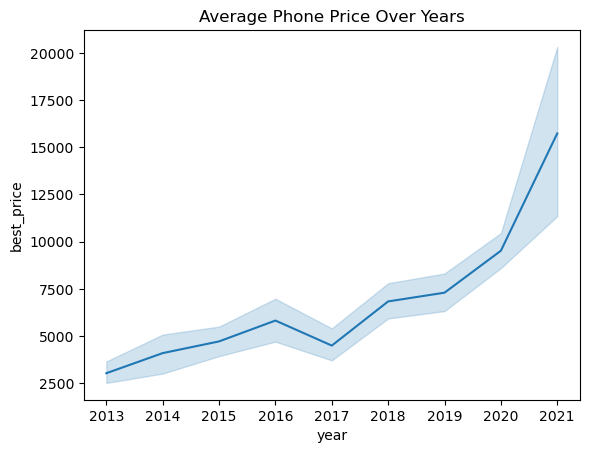

In [16]:
# 5. Price trend by release year
sns.lineplot(x='year', y='best_price', data=phone, estimator='mean')
plt.title("Average Phone Price Over Years")
plt.show()

<h4>OPERATION SYSTEM vs POPULARITY</h4>

<h4>CONC:There is an yearly increase with phone increases</h4>

<Figure size 1000x600 with 0 Axes>

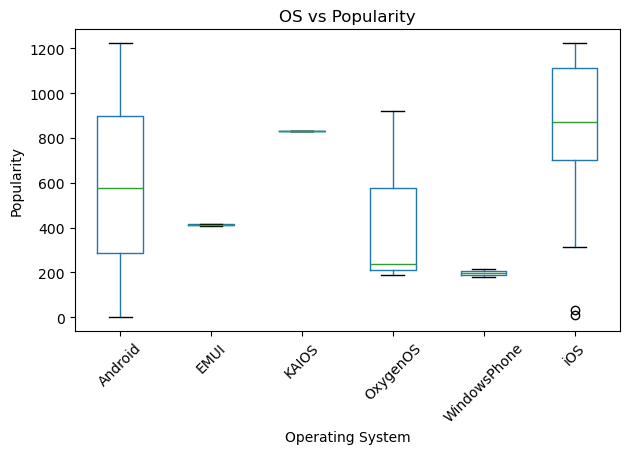

In [33]:
# Create a boxplot of OS vs Popularity
plt.figure(figsize=(10,6))
phone.boxplot(column="popularity", by="os", grid=False)
plt.title("OS vs Popularity")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Operating System")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>The OS with the highest number of popularity is iphone </h3>

<H4>BRAND NAME WITH THE HIGHEST PRICES</H4>

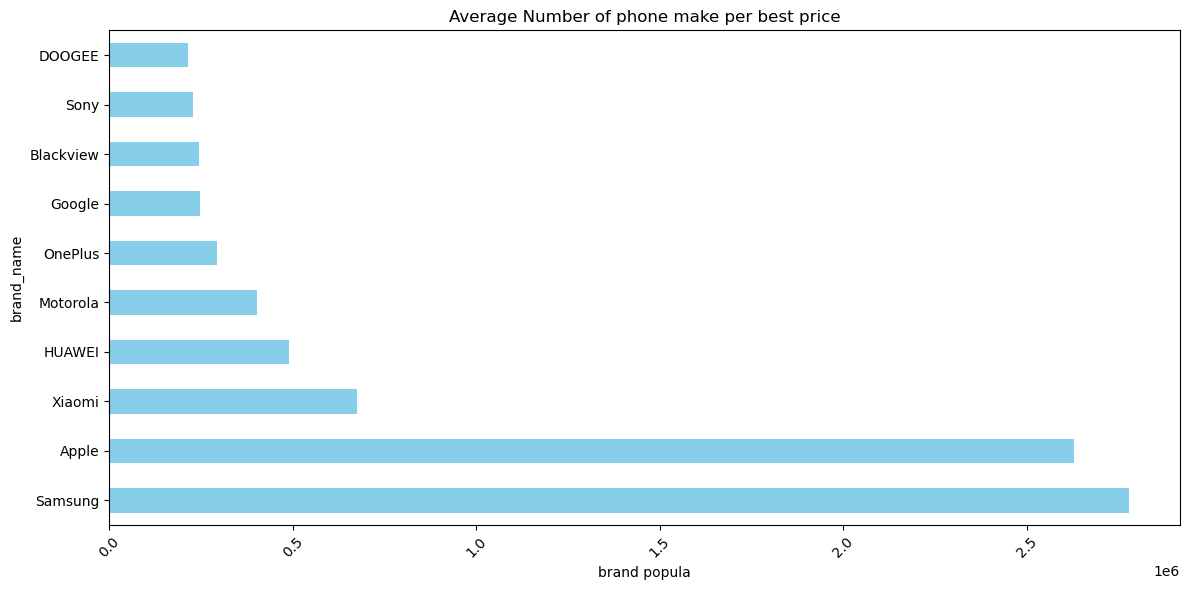

In [40]:
make_pop = phone.groupby('brand_name')["highest_price"].sum().sort_values(ascending=False)

# (Optional) limit to top 10 for clearer plot
make_pop_10 = make_pop.head(10)

# Plot
plt.figure(figsize=(12, 6))
make_pop_10.plot(kind='barh', color='skyblue')

plt.title('Average Number of phone make per best price')
plt.ylabel('brand_name')
plt.xlabel( "brand popula")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>CONC:From the grapgh, phone with the highest number of popularity is blackbery</h3>

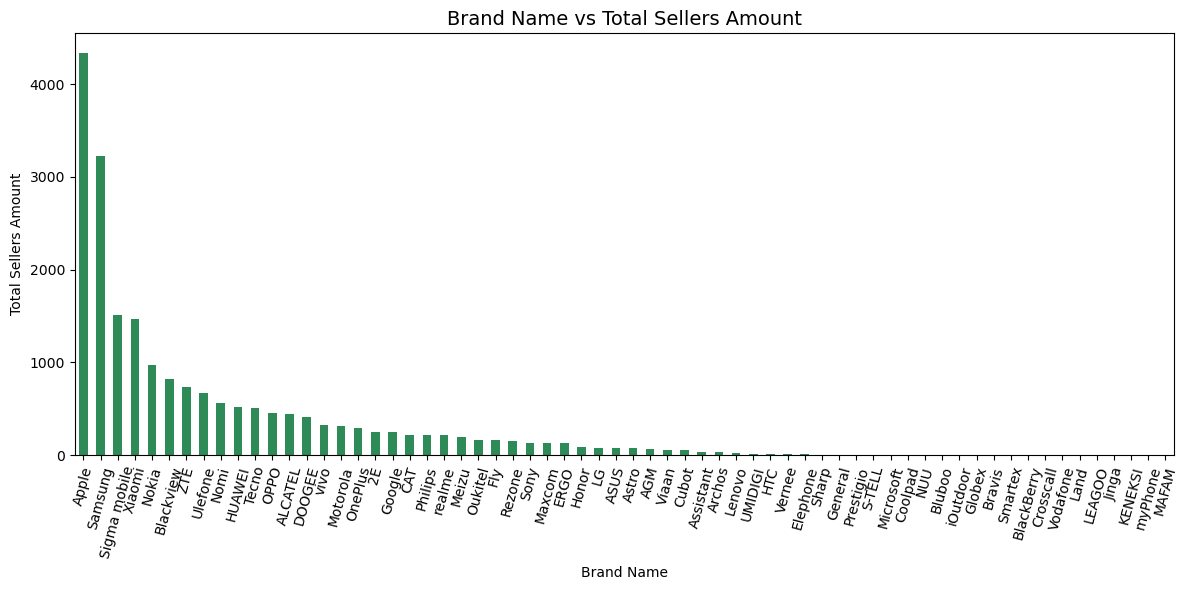

brand_name
Apple           4331
Samsung         3224
Sigma mobile    1516
Xiaomi          1466
Nokia            970
Blackview        823
ZTE              738
Ulefone          668
Nomi             564
HUAWEI           521
Name: sellers_amount, dtype: int64

In [41]:
# Aggregate sellers_amount by brand
brand_sellers = phone.groupby("brand_name")["sellers_amount"].sum().sort_values(ascending=False)

# Plot Brand vs Sellers Amount
plt.figure(figsize=(12,6))
brand_sellers.plot(kind="bar", color="seagreen")
plt.title("Brand Name vs Total Sellers Amount", fontsize=14)
plt.xlabel("Brand Name")
plt.ylabel("Total Sellers Amount")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

brand_sellers.head(10)


<h3>From the graph the brand with the highest number of the seeler counts is Nokia</h3>

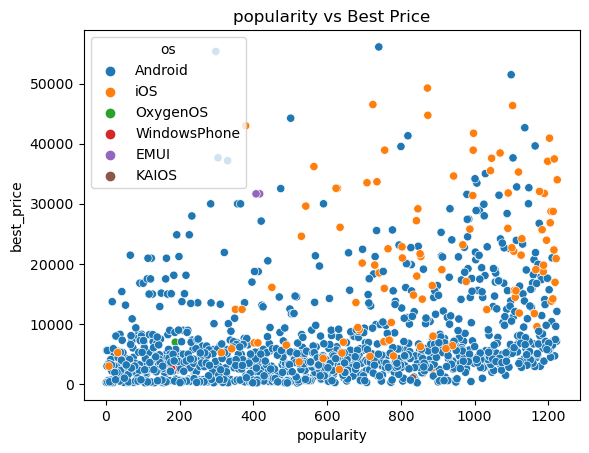

In [20]:
# Screen Size vs Price
sns.scatterplot(x='popularity', y='best_price', hue='os', data=phone)
plt.title("popularity vs Best Price")
plt.show()

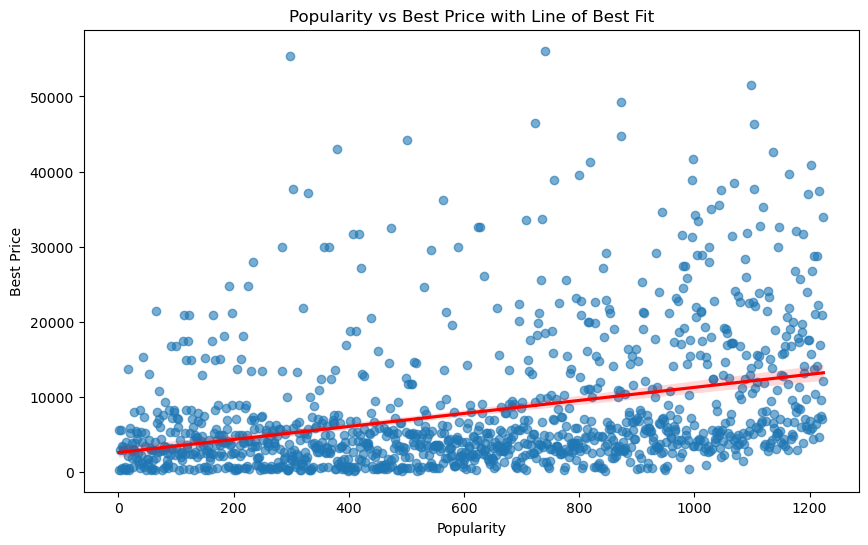

In [21]:
plt.figure(figsize=(10,6))

sns.regplot(x="popularity", y="best_price", data=phone,
            scatter_kws={"alpha":0.6},  # transparency for points
            line_kws={"color":"red"})   # color of best-fit line

plt.title("Popularity vs Best Price with Line of Best Fit")
plt.xlabel("Popularity")
plt.ylabel("Best Price")
plt.show()

<h3>THis graph shows that there is a apositie relationship between popularity and the best prices in the markets </h3>

In [22]:
#phone.to_csv('cleaned_phone_data.csv', index=False)


<h1>MODELS CREATION AND PRICE PREDICTIONS WITH MACHINE LEARNING </h1>